In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


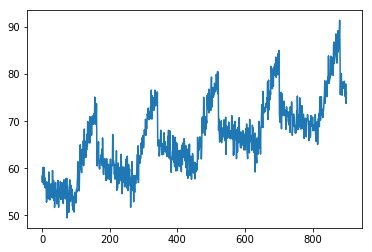

In [49]:
'''
This block of code generates the data we will need for training RNNs.
'''

def getTrend(time, slope=0):
    return slope * time

def getSeasonalPattern(season_time):
    """An arbitary seasonal pattern"""
    return np.where(season_time < 0.4,
                    np.sin(season_time * np.pi),
                    1 / np.exp(2 * season_time))

def addSeasonility(time, period, amplitude=1, phase=90):
    """Repeating pattern"""
    season_time = ((time + phase) % period) / period
    return amplitude * getSeasonalPattern(season_time)

def addNoise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

season_len = 180
time = np.arange(5 * season_len + 1, dtype="float32")
baseline = 5
series = getTrend(time, 0.1)  
baseline = 50
amplitude = 20
slope = 0.02
noise_level = 2

# Create the series
series = baseline + getTrend(time, slope) + addSeasonility(time, period=season_len, amplitude=amplitude)
# Update with noise
series += addNoise(time, noise_level, seed=42)


plt.plot(series)